## Import Required Liabrary

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel(r"Flight_Price_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Q.1 Perform Feature Engineering

a) Perform basic exploration like checking for top 5 records,
shape, statistical info, duplicates, Null values etc.

b) Extract Date, Month, Year from Date of Journey column

In [3]:
df.head()  #  top 5 records

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape  # shape of the Dataset.. No of Rows And Columns

(10683, 11)

## statistical info

In [5]:
df.describe(include="object")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [6]:
df["Price"].describe()   # Min price, average price , max price

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

## Duplicate Data

In [7]:
duplicate_rows = df[df.duplicated()]
print("The shape of duplicated data is", duplicate_rows.shape)
duplicate_rows.head()

The shape of duplicated data is (220, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


## Remove Duplicate Records

In [8]:
df = df.drop_duplicates()

In [9]:
duplicate_rows = df[df.duplicated()]
print("The shape of duplicated data after removing duplicate record is", duplicate_rows.shape)
duplicate_rows.head()

The shape of duplicated data after removing duplicate record is (0, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


### Checking Null Values

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Only one record is null value so we can drop that record

In [11]:
df = df.dropna()

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
df.shape

(10462, 11)

## b) Extract Date, Month, Year from Date of Journey column

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


### Date_of_Journey is object column we convert into a Date time format

In [15]:
df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  object        
 1   Date_of_Journey  10462 non-null  datetime64[ns]
 2   Source           10462 non-null  object        
 3   Destination      10462 non-null  object        
 4   Route            10462 non-null  object        
 5   Dep_Time         10462 non-null  object        
 6   Arrival_Time     10462 non-null  object        
 7   Duration         10462 non-null  object        
 8   Total_Stops      10462 non-null  object        
 9   Additional_Info  10462 non-null  object        
 10  Price            10462 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 980.8+ KB


## Extract Date

In [17]:
df["Date"] = df.Date_of_Journey.dt.day

In [18]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3


## Extract Month

In [19]:
df["Month"] = df.Date_of_Journey.dt.month

In [20]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


## Extract Year

In [21]:
df["Year"] = df.Date_of_Journey.dt.year

In [22]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019


## Re_arrange the Target Columns

In [23]:
list = df.columns
list

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year'],
      dtype='object')

In [24]:
df=df[['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Date', 'Month', 'Year','Price']]

In [25]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,24,3,2019,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,5,1,2019,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,6,9,2019,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,5,12,2019,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,3,1,2019,13302


 _________________________________________________________________________________________________________

## Q.2 Perform Exploratory Data Analysis (EDA) tasks
a) Which airline is most preferred airline

c) Find the majority of the flights take off from which source

d) Find maximum flights land in which destination


### Jet Airways is the most preferred airline

<AxesSubplot:>

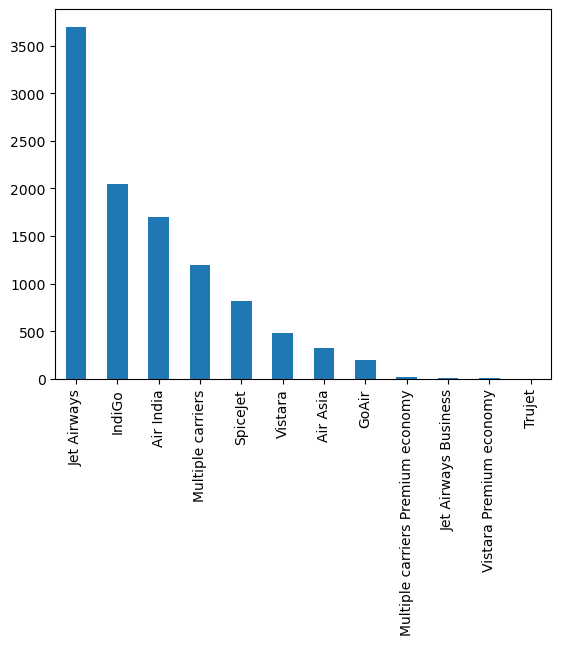

In [26]:
df['Airline'].value_counts().plot(kind = 'bar')

### Delhi is the majority of the flights take off source

<AxesSubplot:>

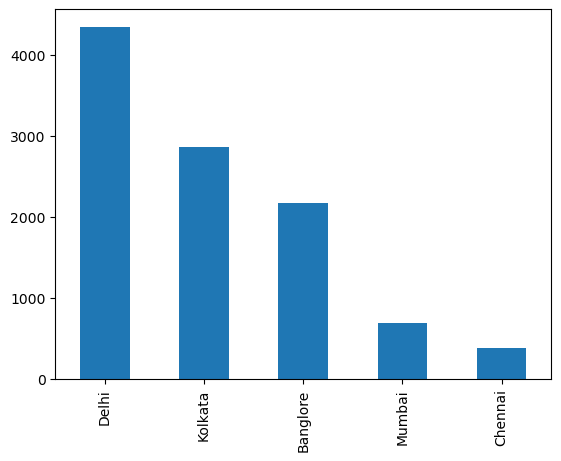

In [27]:
df['Source'].value_counts().plot(kind = 'bar')

## Maximum flights land destination is Cochin

<AxesSubplot:>

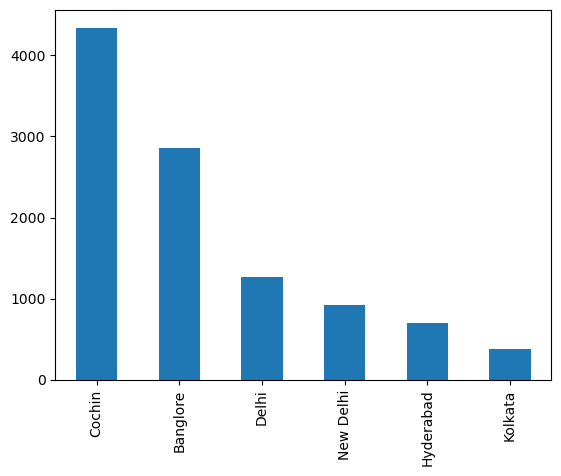

In [28]:
df['Destination'].value_counts().plot(kind = 'bar')

## Q.3 Compare independent features with Target feature to check the impact on price

a) Which airline has the highest price 

b) Check if the business class flights are high price or low and find 
only those flights which price is higher than 50k

### a) Which airline has the highest price

#### Ans: Jet Airways Business has the highest price

In [29]:
df[df.Price == df.Price.max()]  

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year,Price
2924,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,3,1,2019,79512


### b) Check if the business class flights are high price or low and find only those flights which price is higher than 50k

#### High Price Flights

In [30]:
df[(df.Additional_Info =='Business class')& (df.Price > 50000)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year,Price
2924,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,3,1,2019,79512
5372,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,3,1,2019,62427
10364,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,3,1,2019,57209


#### Low Price Flights

In [31]:
df[(df.Additional_Info =='Business class')& (df.Price < 50000)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year,Price
3032,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BDQ → DEL,05:50,12:20,6h 30m,1 stop,Business class,3,1,2019,28097


_____________________________________________________________________________________________________

In [32]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,24,3,2019,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,5,1,2019,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,6,9,2019,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,5,12,2019,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,3,1,2019,13302


## Q.4 Perform encoding for the required features according to the data

In [33]:
df['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

### 78% records having "No info"  records in Additional_Info Column so the column will be in droplist

In [34]:
8182*100/df.shape[0] # records having "No info" c

78.20684381571401

In [35]:
def convert_to_minutes(dur):
    parts = dur.split()
    total_minutes = 0

    for part in parts:
        if 'h' in part:
            total_minutes += int(part[:-1]) * 60
        elif 'm' in part:
            total_minutes += int(part[:-1])

    return total_minutes


In [36]:
df.Duration = df.Duration.apply(convert_to_minutes)

In [37]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,24,3,2019,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,5,1,2019,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,6,9,2019,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,5,12,2019,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,3,1,2019,13302


### Handle Manually

In [38]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [39]:
df['Total_Stops'].replace({'non-stop':0,
                           '1 stop' :1,
                           '2 stops':2,
                           '3 stops':3,
                           '4 stops':4}, inplace = True)

In [40]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,24,3,2019,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,5,1,2019,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,6,9,2019,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,5,12,2019,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,3,1,2019,13302


### Drop The Columns which are not important with the Target variable

In [41]:
df = df.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Additional_Info'],axis = 1)

In [42]:
df

,Airline,Source,Destination,Duration,Total_Stops,Date,Month,Year,Price
0,IndiGo,Banglore,New Delhi,170,0,24,3,2019,3897
1,Air India,Kolkata,Banglore,445,2,5,1,2019,7662
2,Jet Airways,Delhi,Cochin,1140,2,6,9,2019,13882
3,IndiGo,Kolkata,Banglore,325,1,5,12,2019,6218
4,IndiGo,Banglore,New Delhi,285,1,3,1,2019,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0,4,9,2019,4107
10679,Air India,Kolkata,Banglore,155,0,27,4,2019,4145
10680,Jet Airways,Banglore,Delhi,180,0,27,4,2019,7229
10681,Vistara,Banglore,New Delhi,160,0,3,1,2019,12648


## Label Encoding

In [43]:
le = LabelEncoder()

In [44]:
df[df.select_dtypes(include='object').columns] = df[df.select_dtypes(include='object').columns].apply(le.fit_transform)

In [45]:
df

,Airline,Source,Destination,Duration,Total_Stops,Date,Month,Year,Price
0,3,0,5,170,0,24,3,2019,3897
1,1,3,0,445,2,5,1,2019,7662
2,4,2,1,1140,2,6,9,2019,13882
3,3,3,0,325,1,5,12,2019,6218
4,3,0,5,285,1,3,1,2019,13302
...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,0,4,9,2019,4107
10679,1,3,0,155,0,27,4,2019,4145
10680,4,0,2,180,0,27,4,2019,7229
10681,10,0,5,160,0,3,1,2019,12648


## Sampling

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
train_df,test_df = train_test_split(df,test_size=0.2,random_state=42)

In [48]:
print("Split 80% of data into train\n",train_df.shape,"\n And 20% into Test\n",test_df.shape)

Split 80% of data into train
 (8369, 9) 
 And 20% into Test
 (2093, 9)


In [49]:
train_df_x = train_df.iloc[:,:-1]
train_df_y = train_df.iloc[:,-1]

In [50]:
test_df_x = test_df.iloc[:,:-1]
test_df_y = test_df.iloc[:,-1]

## Standarisation

In [51]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [52]:
train_df_x_scaled = scalar.fit_transform(train_df_x)
test_df_x_scaled = scalar.transform(test_df_x)

## Model Building

In [53]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.naive_bayes import GaussianNB

In [91]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression' : Ridge(),
    'Lasso Regression' : Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient_Boosting' : GradientBoostingRegressor(),
    'Naive Bayes' : GaussianNB()
    }

def Model_Training(model_dict, train_df_x_scaled, train_df_y, test_df_x_scaled, test_df_y):
    Metrics = pd.DataFrame()
    Metrics["Performance_Parameters"] = ["Rsquare","AdjRsqure","mse","rmse","mape","accuracy"]
    for i ,j in(models.items()):
        model = models[i]
        print(i)
        model.fit(train_df_x_scaled, train_df_y)
        Rsquare = model.score(train_df_x_scaled, train_df_y)
        N = train_df_x_scaled.shape[0]
        K =  train_df_x_scaled.shape[1]
        AdjRsqure = 1-((1-Rsquare)*(N-1)/(N-K-1))
        pred_train = model.predict(train_df_x_scaled)
        pred_test = model.predict(test_df_x_scaled)
        err_train = train_df_y - pred_train
        err_test =  test_df_y - pred_test
        mse = np.mean(np.square(err_test))  # mean---Squre---Error
        rmse = np.sqrt(mse)
        mape =  np.mean(np.abs((err_test *100/test_df_y)))
        accuracy = np.round((100 - mape),decimals=2)
        print("Accuracy",accuracy)
        Metrics[i] = [Rsquare, AdjRsqure, mse, rmse,mape,accuracy]
        
      
    return Metrics

In [92]:
 Model_Training(models, train_df_x_scaled, train_df_y, test_df_x_scaled, test_df_y)

Linear Regression
Accuracy 67.34
Ridge Regression
Accuracy 67.34
Lasso Regression
Accuracy 67.34
Decision Tree
Accuracy 82.73
Random Forest
Accuracy 84.11
XGBoost
Accuracy 84.85
AdaBoost
Accuracy 71.08
Gradient_Boosting
Accuracy 81.76
Naive Bayes
Accuracy 81.32


,Performance_Parameters,Linear Regression,Ridge Regression,Lasso Regression,Decision Tree,Random Forest,XGBoost,AdaBoost,Gradient_Boosting,Naive Bayes
0,Rsquare,4.182774e-01,4.182774e-01,4.182771e-01,9.429603e-01,9.247365e-01,8.992668e-01,6.059452e-01,7.852979e-01,3.483092e-01
1,AdjRsqure,4.177207e-01,4.177207e-01,4.177204e-01,9.429057e-01,9.246645e-01,8.991704e-01,6.055681e-01,7.850924e-01,3.476856e-01
2,mse,1.193682e+07,1.193678e+07,1.193669e+07,7.698449e+06,5.104056e+06,4.020357e+06,8.361469e+06,5.024968e+06,8.053613e+06
3,rmse,3.454971e+03,3.454965e+03,3.454952e+03,2.774608e+03,2.259216e+03,2.005083e+03,2.891620e+03,2.241644e+03,2.837889e+03
4,mape,3.265908e+01,3.265908e+01,3.265543e+01,1.726840e+01,1.589370e+01,1.514585e+01,2.891543e+01,1.824338e+01,1.867837e+01
5,accuracy,6.734000e+01,6.734000e+01,6.734000e+01,8.273000e+01,8.411000e+01,8.485000e+01,7.108000e+01,8.176000e+01,8.132000e+01


## Conclusion

 * the tree-based models (Decision Tree, Random Forest, and XGBoost) outperform other models in terms of accuracy. 
 

 * Linear models (Linear Regression, Ridge Regression, and Lasso Regression) have lower accuracy, indicating that they may    not capture the underlying relationships as effectively.
 

 * Gradient Boosting, AdaBoost, and Naive Bayes show moderate accuracy and could be considered depending on the specific     requirements and characteristics of your data.

## from Above this all model getting the maximum accuracy from XGBoost that is 84.85 %

### Best Model is XGBoost Regressor

_____________________________________________________________________________________________________

## Test File

In [56]:
df1 = pd.read_excel(r"Flight_Price_Test.xlsx")


### Duplicate Data

In [57]:
duplicate_rows = df1[df1.duplicated()]
print("The shape of duplicated data is", duplicate_rows.shape)
duplicate_rows.head()

The shape of duplicated data is (26, 10)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
294,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,No info
794,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,In-flight meal not included
909,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,20:00,22:55,2h 55m,non-stop,No info
974,Air India,12/06/2019,Kolkata,Banglore,CCU → DEL → AMD → BLR,07:00,05:25 13 Jun,22h 25m,2 stops,No info
1011,Jet Airways,9/05/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 10 May,22h 55m,2 stops,No info


### Remove Duplicate Records¶

In [58]:
df1 = df1.drop_duplicates()

In [59]:
duplicate_rows = df1[df1.duplicated()]
print("The shape of duplicated data after removing duplicate record is", duplicate_rows.shape)
duplicate_rows.head()

The shape of duplicated data after removing duplicate record is (0, 10)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info


### Checking Null Values

In [60]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

### Extract Date, Month, Year from Date of Journey column¶

In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2645 non-null   object
 1   Date_of_Journey  2645 non-null   object
 2   Source           2645 non-null   object
 3   Destination      2645 non-null   object
 4   Route            2645 non-null   object
 5   Dep_Time         2645 non-null   object
 6   Arrival_Time     2645 non-null   object
 7   Duration         2645 non-null   object
 8   Total_Stops      2645 non-null   object
 9   Additional_Info  2645 non-null   object
dtypes: object(10)
memory usage: 227.3+ KB


### Date_of_Journey is object column we convert into a Date time format

In [62]:
df1.Date_of_Journey = pd.to_datetime(df1.Date_of_Journey)

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2645 non-null   object        
 1   Date_of_Journey  2645 non-null   datetime64[ns]
 2   Source           2645 non-null   object        
 3   Destination      2645 non-null   object        
 4   Route            2645 non-null   object        
 5   Dep_Time         2645 non-null   object        
 6   Arrival_Time     2645 non-null   object        
 7   Duration         2645 non-null   object        
 8   Total_Stops      2645 non-null   object        
 9   Additional_Info  2645 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 227.3+ KB


### Extract Date

In [64]:
df1["Date"] = df1.Date_of_Journey.dt.day

In [65]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24


### Extract Month

In [66]:
df1["Month"] = df1.Date_of_Journey.dt.month

In [67]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


### Extract Year

In [68]:
df1["Year"] = df1.Date_of_Journey.dt.year

In [69]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12,2019
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,2019
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019


## Re_arrange the Target Columns

In [70]:
list = df1.columns
list

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Date', 'Month', 'Year'],
      dtype='object')

In [71]:
df1=df1[['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Date', 'Month', 'Year']]

In [72]:
df1.Duration = df1.Duration.apply(convert_to_minutes)

### Handle Manually

In [73]:
df1['Total_Stops'].replace({'non-stop':0,
                           '1 stop' :1,
                           '2 stops':2,
                           '3 stops':3,
                           '4 stops':4}, inplace = True)

## Drop The Columns which are not important with the Target variable

In [74]:
df1 = df1.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Additional_Info'],axis = 1)

In [75]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Date,Month,Year
0,Jet Airways,Delhi,Cochin,655,1,6,6,2019
1,IndiGo,Kolkata,Banglore,240,1,5,12,2019
2,Jet Airways,Delhi,Cochin,1425,1,21,5,2019
3,Multiple carriers,Delhi,Cochin,780,1,21,5,2019
4,Air Asia,Banglore,Delhi,170,0,24,6,2019


### Label Encoder

In [76]:
df1[df1.select_dtypes(include='object').columns] = df1[df1.select_dtypes(include='object').columns].apply(le.fit_transform)

In [77]:
df1

,Airline,Source,Destination,Duration,Total_Stops,Date,Month,Year
0,4,2,1,655,1,6,6,2019
1,3,3,0,240,1,5,12,2019
2,4,2,1,1425,1,21,5,2019
3,6,2,1,780,1,21,5,2019
4,0,0,2,170,0,24,6,2019
...,...,...,...,...,...,...,...,...
2666,1,3,0,1435,1,6,6,2019
2667,3,3,0,155,0,27,3,2019
2668,4,2,1,395,1,3,6,2019
2669,1,2,1,915,1,3,6,2019


In [78]:
df1_scaled = scalar.transform(df1)

In [81]:
xgb_best_model = XGBRegressor()

In [82]:
xgb_best_model.fit(train_df_x_scaled,train_df_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [86]:
Pred_Price = xgb_best_model.predict(df1_scaled)

In [87]:
df1['Price'] = Pred_Price

# Final DataFrame on Test File

In [88]:
df1

,Airline,Source,Destination,Duration,Total_Stops,Date,Month,Year,Price
0,4,2,1,655,1,6,6,2019,11660.514648
1,3,3,0,240,1,5,12,2019,5426.795410
2,4,2,1,1425,1,21,5,2019,12877.900391
3,6,2,1,780,1,21,5,2019,11211.907227
4,0,0,2,170,0,24,6,2019,3652.341797
...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1435,1,6,6,2019,9670.240234
2667,3,3,0,155,0,27,3,2019,4786.573730
2668,4,2,1,395,1,3,6,2019,16560.470703
2669,1,2,1,915,1,3,6,2019,11968.541992
